<a href="https://colab.research.google.com/github/Stefanyvitoria/Modelos-Em-Redes/blob/main/extracao_rede.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020.1 | MODELOS EM REDES - GE3

Aluna: Stefany vitoria da Conceição Izidio

#Analisando a rede de consumidores de animações japonesas


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import networkx as nx
import joblib

In [ ]:
profiles = pd.read_csv(r'/content/drive/MyDrive/Modelos em redes/project/profiles.csv')

In [ ]:
#Removing duplicate row, select attributes and Removing null row
profiles.drop_duplicates(subset='profile',inplace=True) 
profiles = profiles.iloc[:,[0,1,3]]
profiles = profiles.loc[profiles['gender'] == 'Female']
profiles.dropna(inplace=True)

In [ ]:
profiles

,profile,gender,favorites_anime
1,baekbeans,Female,"['11061', '31964', '853', '20583', '918', '925..."
10,angelsreview,Female,"['534', '71', '7724', '861', '5060', '853']"
22,SakuraSan628,Female,"['232', '8129', '7791', '10460', '18507']"
27,GinKagu,Female,"['918', '2904', '4181', '9989']"
35,greatyu,Female,"['20', '21', '918', '11061', '934', '13125']"
...,...,...,...
77445,memetendo,Female,"['32281', '15051', '199', '32995', '5060', '31..."
77452,meri_nicole,Female,"['205', '5060', '966', '2605']"
77468,Sarkasse,Female,[]
77473,SuzumiyaHaruhi,Female,"['1604', '355', '1195', '3457', '849']"


In [ ]:
profiles['favorites_anime'] = profiles['favorites_anime'].apply(lambda x: eval(x) )

In [ ]:
graph = nx.Graph()

rows = profiles.values
for index, row1 in enumerate(rows): #For each register (user)

  user1 = row1[0]
  list_uids1 = row1[-1]
  graph.add_node(user1)

  for row2 in rows[index+1:]: #For each user from user1 onwards
    user2 = row2[0]
    list_uids2 = row2[-1]
    graph.add_node(user2)

    if len([uid for uid in list_uids1 if uid in list_uids2]) >= 3: #Check the amount of anime in common
      graph.add_edge(user1, user2)


joblib.dump(graph, r'/content/drive/MyDrive/Modelos em redes/project/graph.pkl')

['/content/drive/MyDrive/Modelos em redes/project/graph.pkl']

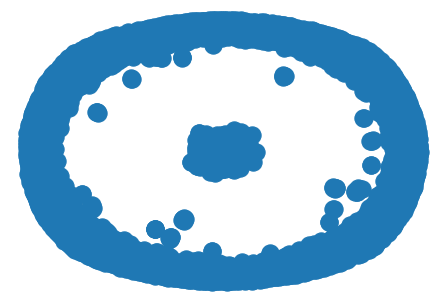

In [ ]:
nx.draw(graph, edge_color= 'red')